In [0]:
from matplotlib import pyplot as plt
from albumentations import Flip,Rotate,Blur,Compose
import numpy as np
import cv2

In [0]:
def scale_minMax(image):
    mini,maxi = np.min(image),np.max(image)
    return ((image - mini)/(maxi-mini)).astype(np.float32)

In [3]:
!wget https://www.fcbarcelonanoticias.com/uploads/s1/11/89/70/8/neymar-psg-celebration_4_641x361.jpeg -O neymar.jpg

--2020-04-25 18:58:42--  https://www.fcbarcelonanoticias.com/uploads/s1/11/89/70/8/neymar-psg-celebration_4_641x361.jpeg
Resolving www.fcbarcelonanoticias.com (www.fcbarcelonanoticias.com)... 104.26.14.228, 104.26.15.228, 2606:4700:20::681a:fe4, ...
Connecting to www.fcbarcelonanoticias.com (www.fcbarcelonanoticias.com)|104.26.14.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25962 (25K) [image/jpeg]
Saving to: ‘neymar.jpg’

neymar.jpg          100%[===================>]  25.35K  --.-KB/s    in 0s      

2020-04-25 18:58:42 (88.4 MB/s) - ‘neymar.jpg’ saved [25962/25962]



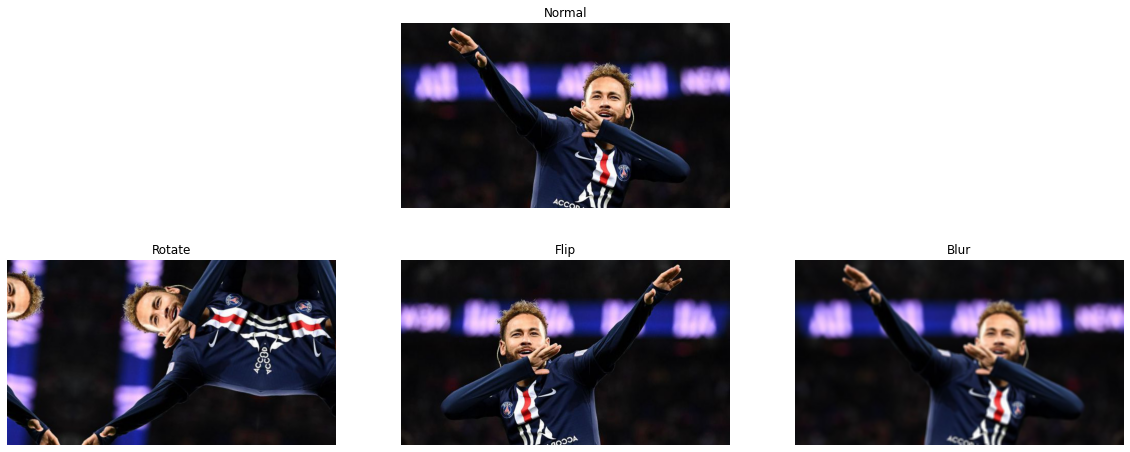

In [4]:

image = plt.imread('neymar.jpg')
# image = cv2.cvtColor(scale_minMax(image),cv2.COLOR_RGB2GRAY)
image = scale_minMax(image)
plt.figure(figsize=[20,8])

plt.subplot(232)
plt.imshow(image);
plt.title('Normal')
plt.axis('off')

rot_image = Rotate(limit=(-90,90),interpolation=cv2.INTER_LINEAR,p=1)
plt.subplot(234)
plt.imshow(rot_image.apply(image,**rot_image.get_params()));
plt.title('Rotate')
plt.axis('off')

flip_image = Flip(p=1)
plt.subplot(235)
plt.imshow(flip_image.apply(image,**flip_image.get_params()));
plt.title('Flip')
plt.axis('off')

blur_image = Blur(blur_limit= 10,p=1)
plt.subplot(236)
plt.imshow(blur_image.apply(image,**blur_image.get_params()));
plt.title('Blur')
plt.axis('off')

plt.show()

In [0]:
def composed_augmentations(p=0.5):
    return Compose([
        Flip(),
        Rotate(limit=(90,-90)),
        Blur(blur_limit = 9),
    ], p=p) 

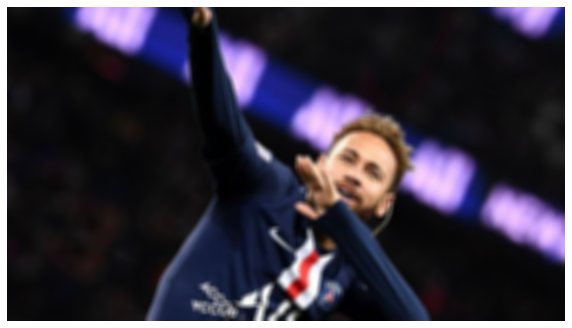

In [7]:
def augment_and_show(aug, image):

    image = aug(image=image)['image']
    plt.figure(figsize=[10, 10])
    plt.axis('off')
    plt.imshow(image);


aug = composed_augmentations(p=1)
augment_and_show(aug, image)
